In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[ 99.43179012],
       [ 52.06653967],
       [ 57.87895355],
       [ 73.48190583],
       [ 54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [6]:
add_op = a + b

In [7]:
mul_op = a * b

In [18]:
with tf.Session() as sess:
    print(sess.run(tf.ones([1,3])))

[[ 1.  1.  1.]]


In [19]:
with tf.Session() as sess:
    print(sess.run(add_op,feed_dict={a:rand_a,b:rand_b}))
    
    print("\n")
    
    print(sess.run(mul_op,feed_dict={a:rand_a,b:rand_b}))

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Tensorflow Basic NN

In [27]:
n_features = 10
n_dense_neurons = 3

In [28]:
# shape of is x is (n_training_examples, n_features)
x = tf.placeholder(tf.float32,shape=(None,n_features))

In [29]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [30]:
b = tf.Variable(tf.ones([n_dense_neurons])) 

In [31]:
Wx = tf.matmul(x,W)

In [32]:
z = tf.add(Wx,b)

In [33]:
a = tf.sigmoid(z)

In [34]:
init = tf.global_variables_initializer()

In [35]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})
    
    print(layer_out)

[[ 0.23555243  0.36481911  0.86216408]]


In [40]:
np.random.random((1,n_features))

array([[ 0.44236813,  0.87758732,  0.94926413,  0.47816742,  0.46111934,
         0.63728903,  0.324608  ,  0.11757809,  0.051101  ,  0.63765865]])

# Simple Regression

In [49]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ 1.32677787,  1.8205851 ,  1.43761539,  4.30465452,  5.22628478,
        5.23968278,  5.76723042,  8.4155672 ,  9.92481558,  9.60593962])

In [50]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([ -0.18905964,   0.6809041 ,   1.44143444,   3.79346776,
         4.11576205,   6.02890461,   6.25348673,   7.34728382,
         7.97464369,  11.46193825])

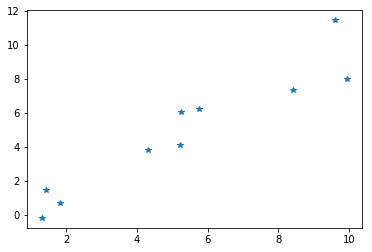

In [51]:
plt.plot(x_data,y_label,'*')

In [52]:
np.random.rand(2)

array([ 0.02330549,  0.54808045])

In [53]:
m = tf.Variable(np.random.rand(2)[0])
b = tf.Variable(np.random.rand(2)[1])

In [56]:
list(zip(x_data,y_label))

[(1.3267778665724728, -0.18905964297528888),
 (1.8205851049146866, 0.68090410391900047),
 (1.4376153862056129, 1.4414344427331951),
 (4.304654518143912, 3.7934677570897266),
 (5.2262847799912633, 4.1157620467907563),
 (5.2396827776671717, 6.0289046092470748),
 (5.767230418563142, 6.2534867318232381),
 (8.4155671975662241, 7.3472838195058365),
 (9.9248155797855286, 7.9746436903206499),
 (9.6059396231903911, 11.46193825159418)]

In [59]:
error = 0

for x,y in zip(x_data,y_label):
    
    # get the predicted value
    y_hat = m*x+b
    
    # calculate by how much predicted value is off and square it
    error += (y - y_hat)**2



In [60]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [61]:
train = optimizer.minimize(error)

In [62]:
init = tf.global_variables_initializer()

In [67]:
training_steps = 100

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])    
    

In [66]:
final_slope, final_intercept

(0.98629071680992253, -0.20196489290335951)

In [52]:
x_test = np.linspace(-1,11,10)
y_test = final_slope * x_test + final_intercept

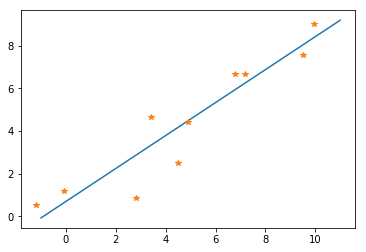

In [53]:
plt.plot(x_test,y_test)
plt.plot(x_data,y_label,'*')